# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most usefull fuctions of the beautiful Scikit-Learn library.

What are we going to cover

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problem
3. Fit the model/algorithm/estimator and use it to make predictions on our data
4. Evaluating a model
5. Save and load a trained model
6. Putting it all together

## 0. An end-to-end Scikit-Learn workflow

In [1]:
# 1. Ge the data read
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Create x (features matrix)
x = heart_disease.drop("target", axis=1)

# Create y labels
y = heart_disease["target"]

In [3]:
# Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier class
clf = RandomForestClassifier()

# We'll keep the default hyperpameter
# Check the hyperparameters used by the model/estimator/algorithm
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# Fit the model to the training data

# 1. Split the data using sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [5]:
# Fit the model on training data
clf.fit(x_train, y_train);

In [6]:
# Make a prediction
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [7]:
y_test

275    0
266    0
220    0
174    0
278    0
      ..
145    1
9      1
104    1
170    0
95     1
Name: target, Length: 61, dtype: int64

In [8]:
# Evaluate the model on training data and test data
clf.score(x_train, y_train)

1.0

In [9]:
clf.score(x_test, y_test)

0.7704918032786885

In [10]:
# Import additional evaluation methods
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        26
           1       0.84      0.74      0.79        35

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61



In [11]:
confusion_matrix(y_test, y_preds)

array([[21,  5],
       [ 9, 26]], dtype=int64)

In [12]:
accuracy_score(y_test, y_preds)

0.7704918032786885

In [13]:
# Improve a model
# Try with different amount of n-estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators....")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100 : .2f} %")


Trying model with 10 estimators....
Model accuracy on test set:  73.77 %
Trying model with 20 estimators....
Model accuracy on test set:  78.69 %
Trying model with 30 estimators....
Model accuracy on test set:  77.05 %
Trying model with 40 estimators....
Model accuracy on test set:  77.05 %
Trying model with 50 estimators....
Model accuracy on test set:  77.05 %
Trying model with 60 estimators....
Model accuracy on test set:  77.05 %
Trying model with 70 estimators....
Model accuracy on test set:  75.41 %
Trying model with 80 estimators....
Model accuracy on test set:  80.33 %
Trying model with 90 estimators....
Model accuracy on test set:  77.05 %


In [14]:
# Save the model and load
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [15]:
# Load the model
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))

In [16]:
loaded_model.score(x_test, y_test)

0.7704918032786885

## Debugging Warnings in Jupyter

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
# Reset warnings filter
warnings.filterwarnings("default")

In [19]:
# Checking version of Scikit-Learn
import sklearn
sklearn.show_versions()

E:\StudyMaterial\Data Science\Projects\sample_project1\env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



System:
    python: 3.9.5 (default, May 18 2021, 14:42:02) [MSC v.1916 64 bit (AMD64)]
executable: E:\StudyMaterial\Data Science\Projects\sample_project1\env\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
          pip: 21.1.1
   setuptools: 52.0.0.post20210125
      sklearn: 0.24.2
        numpy: 1.20.2
        scipy: 1.6.2
       Cython: None
       pandas: 1.2.4
   matplotlib: 3.3.4
       joblib: 1.0.1
threadpoolctl: 2.1.0

Built with OpenMP: True


## 1. Scikit-Learn - Getting your data ready

Three main things we have to do:

    1. Split the data into features and labels (usually x & y)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

E:\StudyMaterial\Data Science\Projects\sample_project1\env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 1. Split the data into features and labels (usually X & Y)

In [21]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Create features set
X = heart_disease.drop("target", axis = 1)

In [23]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
# Create labels set
Y = heart_disease["target"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [25]:
# Split the data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [26]:
X_train.shape, X_test.shape, Y_test.shape, Y_train.shape

((242, 13), (61, 13), (61,), (242,))

### 2. Filling (also called imputing) or disregarding missing values

In [27]:
len(heart_disease)

303

### Make sure the data is all numerical
If not convert it to numerical

In [28]:
# Create data frame from car_sales extended data csv
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head(), len(car_sales)

(     Make Colour  Odometer (KM)  Doors  Price
 0   Honda  White          35431      4  15323
 1     BMW   Blue         192714      5  19943
 2   Honda  White          84714      4  28343
 3  Toyota  White         154365      4  13434
 4  Nissan   Blue         181577      3  14043,
 1000)

In [29]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [30]:
# Split the data into X/Y
X = car_sales.drop("Price", axis=1)
Y = car_sales["Price"]
X.head(), Y.head()

(     Make Colour  Odometer (KM)  Doors
 0   Honda  White          35431      4
 1     BMW   Blue         192714      5
 2   Honda  White          84714      4
 3  Toyota  White         154365      4
 4  Nissan   Blue         181577      3,
 0    15323
 1    19943
 2    28343
 3    13434
 4    14043
 Name: Price, dtype: int64)

In [31]:
# Split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
X_test.shape, X_train.shape, Y_test.shape, Y_train.shape

((250, 4), (750, 4), (250,), (750,))

In [32]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
#model.fit(X_train, Y_train)
#model.score(X_test, Y_test)

# Note: This modeling doesn't work because of non-numerical data

In [33]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [34]:
X.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
dtype: object

In [35]:
# Convert non-numeric features into numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Specify categorical features
categorical_features = ["Make", "Colour", "Doors"]

# Instantiate OneHotEncoder
one_hot = OneHotEncoder()

# Instantiate the ColumnTransformer
transformer = ColumnTransformer([("one_hot", 
                                  one_hot,
                                  categorical_features)],
                                 remainder="passthrough")

# Transform X
transformed_X = transformer.fit_transform(X)
transformed_X[:5]
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [36]:
# Calculate unique values in each column
pd.unique(X["Colour"]), pd.unique(X["Make"]), pd.unique(X["Doors"])

(array(['White', 'Blue', 'Red', 'Green', 'Black'], dtype=object),
 array(['Honda', 'BMW', 'Toyota', 'Nissan'], dtype=object),
 array([4, 5, 3], dtype=int64))

In [37]:
# Convert categorical data into dummy or indicator variables
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [38]:
# Let's refit the model
np.random.seed(42)
# Split the transformed data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

# Fit the model
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.3235867221569877

### What if there were missing data?
1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether

In [39]:
# Import car_sales_missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [40]:
# Check how many missing values ae there
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
# Split the data into X/Y
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]
X.shape, Y.shape

((1000, 4), (1000,))

In [42]:
# Let's try and convert our data to numbers

# Import required interfaces
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Specify categorical features
categorical_features = ["Make", "Colour", "Doors"]

# Instantiate OneHotEncoder
one_hot = OneHotEncoder()

# Instantiate ColumnTransformer
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

# Transform X
transformed_X = transformer.fit_transform(X)
transformed_X[:10]

# Create data frame from transformed X
pd.DataFrame(transformed_X).head()

# Calculate unique values in each column
pd.unique(X["Make"]), pd.unique(X["Colour"]), pd.unique(X["Doors"])

# Convert categorical data into dummy or indicator variables
dummies = pd.get_dummies(["Make", "Colour", "Doors"])
dummies

,Colour,Doors,Make
0,0,0,1
1,1,0,0
2,0,1,0


#### Option 1- Fill missing data with Pandas

In [43]:
# Import car_sales_missing data again
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [44]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [45]:
# Fill the Make column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the Colour column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the Odometer Column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the doors column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [46]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [47]:
# Remove rows with missing Prices
car_sales_missing.dropna(inplace=True)

In [48]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [49]:
len(car_sales_missing)

950

In [50]:
# Split the data into X/Y
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]
X.shape, Y.shape

((950, 4), (950,))

In [51]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [52]:
# Let's try again with missing data gone to convert our data to numbers

# Import required interfaces
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Specify categorical features
categorical_features = ["Make", "Colour", "Doors"]

# Instantiate OneHotEncoder
one_hot = OneHotEncoder()

# Instantiate ColumnTransformer
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

# Pass additional parameter sparse_threshold=0 to avoid creating sparx matrix
# transformer = ColumnTransformer([("one_hot",
#                                   one_hot,
#                                   categorical_features)],
#                                 remainder="passthrough",
#                                 sparse_threshold=0)

# Transform X
transformed_X = transformer.fit_transform(X)

# Create data frame from transformed X sparx matrix
import scipy.sparse
transformed_X_df = pd.DataFrame.sparse.from_spmatrix(transformed_X)
transformed_X_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


### Fill missing values with Scikit-Learn

In [53]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# Import data from csv
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")

In [55]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [56]:
# Check for missing data
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [57]:
# Remove data having value of target missing
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [58]:
# Split data in X and Y
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]
X.shape, Y.shape

((950, 4), (950,))

In [59]:
# Split the data set into training and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_test.shape, X_train.shape, Y_test.shape, Y_train.shape

((190, 4), (760, 4), (190,), (760,))

In [60]:
# Fill missing data using Scikit-Learn
# Import required package
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Specify categorical features
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create a imputer (something that fills the missing data)
imputer = ColumnTransformer([
                             ("cat_imputer", cat_imputer, cat_features),
                             ("door_imputer", door_imputer, door_features),
                             ("num_imputer", num_imputer, num_features)])

# Transform the data
X_train_filled = imputer.fit_transform(X_train)
X_test_filled = imputer.fit_transform(X_test)
X_test_filled[:5], X_train_filled[:5]

(array([['Toyota', 'Red', 4.0, 133195.0],
        ['BMW', 'White', 5.0, 37513.0],
        ['Toyota', 'White', 4.0, 28809.0],
        ['Nissan', 'White', 4.0, 82429.0],
        ['Nissan', 'White', 4.0, 234161.0]], dtype=object),
 array([['Toyota', 'Black', 4.0, 86696.0],
        ['Toyota', 'Black', 4.0, 20714.0],
        ['Toyota', 'White', 4.0, 134415.0],
        ['Toyota', 'Green', 4.0, 130710.2301369863],
        ['Honda', 'White', 4.0, 145850.0]], dtype=object))

In [61]:
car_sales_train_filled = pd.DataFrame(X_train_filled, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_test_filled = pd.DataFrame(X_test_filled, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_train_filled.head(), car_sales_test_filled.head()

(     Make Colour Doors  Odometer (KM)
 0  Toyota  Black   4.0        86696.0
 1  Toyota  Black   4.0        20714.0
 2  Toyota  White   4.0       134415.0
 3  Toyota  Green   4.0  130710.230137
 4   Honda  White   4.0       145850.0,
      Make Colour Doors Odometer (KM)
 0  Toyota    Red   4.0      133195.0
 1     BMW  White   5.0       37513.0
 2  Toyota  White   4.0       28809.0
 3  Nissan  White   4.0       82429.0
 4  Nissan  White   4.0      234161.0)

### Convert non-numerical data to numerical numbers

In [62]:
# Import necessary packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Specify categorical features
categorical_features = ["Make", "Colour", "Doors"]

# Instantiate OneHotEncoder
one_hot = OneHotEncoder()

# Instantiate ColumnTransformer
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder="passthrough",
                                sparse_threshold=0)

# Transform car_sales_train_filled and car_sales_test_filled
transformed_car_sales_train_filled = transformer.fit_transform(car_sales_train_filled)
transformed_car_sales_test_filled = transformer.fit_transform(car_sales_test_filled)

# Create data frames for transformed car_sales_train_filled and car_sales_test_filled
df_transformed_car_sales_train_filled = pd.DataFrame(transformed_car_sales_train_filled)
df_transformed_car_sales_test_filled = pd.DataFrame(transformed_car_sales_test_filled)
df_transformed_car_sales_test_filled.head(), df_transformed_car_sales_train_filled.head()

(    0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
 0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
 1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
 2  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
 3  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
 4  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
 
          14  
 0  133195.0  
 1   37513.0  
 2   28809.0  
 3   82429.0  
 4  234161.0  ,
     0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
 0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
 1  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
 2  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
 3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
 4  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.

In [63]:
transformed_car_sales_train_filled[:5]

array([[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 86696.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 20714.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,
        0.0, 134415.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 130710.2301369863],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,
        0.0, 145850.0]], dtype=object)

In [64]:
# Let's fit the machine learning model
np.random.seed(42)
# Import necessary packages 
from sklearn.ensemble import RandomForestRegressor

# Instantiate RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)

# Fit the model on training data
model.fit(df_transformed_car_sales_train_filled, Y_train)

# Test the model on test data
model.score(df_transformed_car_sales_test_filled, Y_test)

0.10029498332004949

## 2. Choosing the right estimator/algorithm/model for our problem

Scikit_Learn used estimator as another term for machine learning model or algorithm

Check the problem type:

1. Classification - Predicting whether a sample is one thing or another
2. Regression - Predicting a number

Step 1: Check the Scikit-Learn machine learnig map:
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for regression problem

In [65]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
# Import built-in Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [67]:
# Create data frame from Boston Data Set dictionary
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [68]:
len(boston_df)

506

In [69]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [70]:
# Split the data into X and Y
X = boston_df.drop("target", axis=1)
Y = boston_df["target"]
X.shape, Y.shape

((506, 13), (506,))

In [71]:
# Let's try the Ridge Regression model
# Import necessary packages
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_test.shape, X_train.shape, Y_test.shape, Y_train.shape

# Instantiate the Ridge Regression model/estimator
model = Ridge()

# Fit the model on training data set
model.fit(X_train, Y_train)

# Check the score of Ridge model on test data
model.score(X_test, Y_test)

0.6662221670168521

#### How do we improve the score?
#### What if Ridge machine learning model/algorithm/estimator is not working?

Let's refer back to the Scikit-Learn machine learning map:
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 

##### Ensemble Methods:- 
The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Two families of ensemble methods are usually distinguished:

1. In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.
   Examples: Bagging methods, Forests of randomized trees, …
   
2. By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.
   Examples: AdaBoost, Gradient Tree Boosting, …

In [72]:
# Let's try RandomForestRegressor on previous boston data set
# Import necessary packages
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Set the random seed
np.random.seed(42)

# Split the data in X and Y
X = boston_df.drop("target", axis=1)
Y = boston_df["target"]

# Split the data set into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate the RandomForestRegressor model
rf = RandomForestRegressor()

# Fit the RandomForestRegressor model on training data
rf.fit(X_train, Y_train)

# Evaluate and score the RandomForestRegressor model
rf.score(X_test, Y_test)

0.8654448653350507

In [73]:
# Check the Ridge model
model.score(X_test, Y_test)

0.6662221670168521

### 2.2 Picking a machine learning model for classification problem

In [74]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
# Import data from csv and create data frame
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
len(heart_disease)

303

In [77]:
# Let's try Linear Support Vector Machine
# Import necessary packages
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# Set the random seed
np.random.seed(42)

# Split the data into X and Y
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate the Linear SVC
lsvc = LinearSVC()

# Fit the Linear SVC model on training data
lsvc.fit(X_train, Y_train)

# Evaluate and score the Linear SVC model on test data
lsvc.score(X_test, Y_test)

0.8688524590163934

In [78]:
lsvc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [79]:
# Let's use RandomForestClassifier from ensemble on previous heart_disease data
# Import the necessary packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Set the random seed
np.random.seed(42)

# Split the data into X and Y
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate the RandomForestClassifier model 
clf = RandomForestClassifier()

# Fit the RandomForestClassifier model on training data set
clf.fit(X_train, Y_train)

# Evaluate and score the RandomForestClassifier model on test data
clf.score(X_test, Y_test)

0.8524590163934426

##### Tidbit:
1. If you have structured data use ensemble methods
2. If you have unstructured data use deep learning or transfer learning

## 3. Fitting the model/algorithm and use it to make predictions on our data

### 3.1 Fitting the model to the data

Different names for
* 'X' = features, feature variables, data
* 'Y' = labels, targets, target variables

In [80]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
# Let's try RandomForestClassifier on heart_disease data
# Import necessary packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Set the random seed
np.random.seed(42)

# Split the data into X and Y
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# Split the data into training and test data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate the RandomForestClassifier model
clf = RandomForestClassifier()

# Fit the RandomForesClassifier model on our training data
clf.fit(X_train, Y_train)

# Evaluate and score the RandomForestClassifier model on our test data
clf.score(X_test, Y_test)

0.8524590163934426

In [82]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### 3.2 Make predictions using our trained machine learning model
#### 3.2.1 Classification
2 ways to make predictions:
1. 'predict()'
2. 'predict_proba()'

In [83]:
# Use a trained model to make predictions using predict 
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [84]:
np.array(Y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [85]:
# Compare predictions to truth labels to evaluate the model
Y_preds = clf.predict(X_test)
np.mean(Y_preds == Y_test)

0.8524590163934426

In [86]:
# Check the accuracy score of the model on given test data
# Import necessary package
from sklearn.metrics import accuracy_score

# Calculate accuracy score
accuracy_score(Y_test, Y_preds)

0.8524590163934426

In [87]:
# Use a trained model to make predictions using predict_proba - returns probability of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

#### 3.2.2 Regression

In [88]:
# Let's try RandomForestRegressor on previous boston data set
# Import necessary packages
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Set the random seed
np.random.seed(42)

# Split the data in X and Y
X = boston_df.drop("target", axis=1)
Y = boston_df["target"]

# Split the data set into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate the RandomForestRegressor model
rf = RandomForestRegressor()

# Fit the RandomForestRegressor model on training data
rf.fit(X_train, Y_train)

# Evaluate and score the RandomForestRegressor model
rf.score(X_test, Y_test)

0.8654448653350507

In [89]:
# Use a trained model to make predictions using predict 
rf.predict(X_test)

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639, 19.787, 19.541,  8.583, 21.85 , 19.531, 25.851,
       19.759,  8.22 , 45.109, 14.712, 24.548, 23.956, 14.548, 22.944,
       15.023, 14.643, 21.137, 14.153, 19.232, 20.666, 19.588, 23.254,
       33.01 , 20.461, 14.271, 15.889, 34.704, 19.154, 20.85 , 24.395,
       18.978, 29.84 , 45.302, 19.447, 22.234, 13.751, 15.511, 24.612,
       18.729, 28.235, 21.21 , 34.218, 17.271, 26.147, 45.279, 21.924,
       15.532, 32.412, 22.212, 20.453, 25.532, 34.326, 28.795, 18.951,
       27.145, 17.181, 13.534, 23.04 , 28.714, 15.802, 20.451, 27.87 ,
       10.193, 21.507, 22.383,  7.265, 20.089, 45.388, 10.88 , 13.053,
       21.322, 12.366, 20.233,  9.135, 20.052, 26.787, 15.277, 23.267,
       23.613, 17.699, 21.617,  7.921, 19.475, 18.807, 22.386, 19.836,
       38.714, 13.159, 12.476, 13.612, 20.205, 23.832])

In [90]:
# Compare predictions to truth labels to evaluate the model
# Import necessary packages
from sklearn.metrics import mean_absolute_error

# Calculate mean absolute error
Y_preds = rf.predict(X_test)
mean_absolute_error(Y_test, Y_preds)

2.136382352941176

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn estimator/model:

1. Estimator 'score' method
2. The 'scoring' parameter
3. Problem specific metric functions

### 4.1 Evaluating a model using the estimator score method

In [91]:
# Let's try RandomForestClassifier model from ensemble on previous heart_disease data set
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Set the random seed
np.random.seed(42)

# Split the data into X and Y
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# Split the data set into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate the RandomForestClassifier machine learning model
clf = RandomForestClassifier()

# Fit the RandomForestClassifier machine learning model on training data set
clf.fit(X_train, Y_train)

# Evaluate and score the RandomForestClassifier model on test data set
clf.score(X_test, Y_test)

0.8524590163934426

In [92]:
# Let's try RandomForestRegressor on previous boston data set
# Import necessary packages
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Set the random seed
np.random.seed(42)

# Split the data into X and Y
X = boston_df.drop("target", axis=1)
Y = boston_df["target"]

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate the RandomForestRegressor machine learning model
model = RandomForestRegressor()

# Fit the RandomForestRegressor model on training data set
model.fit(X_train, Y_train)

# Evaluate and score the RandomForestRegressor model on test data set
model.score(X_test, Y_test)

0.8654448653350507

#### Cross-Validation

In [93]:
# Let's try RandomForestClassifier model from ensemble on previous heart_disease data set
# Import necessary packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Import corss_val_score
from sklearn.model_selection import cross_val_score

# Set the random seed
np.random.seed(42)

# Split the data into X and Y
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# Split the data set into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate the RandomForestClassifier machine learning model
clf = RandomForestClassifier()

# Fit the RandomForestClassifier machine learning model on training data set
clf.fit(X_train, Y_train)

# Evaluate and score the RandomForestClassifier model on test data set using score method
clf.score(X_test, Y_test)

0.8524590163934426

In [94]:
# Evaluate and score the RandomForestClassifier model on test data set using cross validation
cross_val_score(clf, X, Y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [95]:
# Change the number of folds to 10
cross_val_score(clf, X, Y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [96]:
# Set the random seed
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test,Y_test)

# Take the mean of 5-fold cross-validation score
clf_cv5_score = np.mean(cross_val_score(clf, X, Y, cv=5))

# Compare the two
clf_single_score, clf_cv5_score

(0.8524590163934426, 0.8248087431693989)

In [97]:
# Default scoring parameters of classifier is mean-accuracy
# Scoring parameter is None by default for cross-validation
cross_val_score(clf, X, Y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

#### 4.2.1. Classification Model - Evaluation Metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification Report

##### 4.2.1.1 Accuracy

In [98]:
# Let's try RandomForestClassifier model from ensemble on previous heart_disease data set
# Import necessary packages
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Set the random seed
np.random.seed(42)

# Split the data into X and Y
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate RandomForestClassifier machine learning model
clf = RandomForestClassifier()

# Fit the RandomForestClassifier machine learning model on training data
clf.fit(X_train, Y_train)

# Evaluate and score the RandomForestClassifier model on test data set using cross validation
cross_val_score = cross_val_score(clf, X, Y, cv=5)
cross_val_score,
np.mean(cross_val_score)

0.811639344262295

In [99]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100} %")

Heart Disease Classifier Cross-Validated Accuracy: 81.1639344262295 %


##### 4.2.1.2. Area under ROC curve

* AUC - Aread Under Curve
* ROC - Receiver Operating Characterstics

ROC curves are a comparison of a model's true positive rate (tpr) vs a model's false positive rate (fpr):
* True Positive = model predicts 1 when truth is 1
* False Positive = model predicts 1 when truth is 0
* True Negative = model predicts 0 when truth is 0
* False Negative = model predicts 0 when truth is 1

In [100]:
# Import necessary packages
from sklearn.metrics import roc_curve

# Make predictions with probabilities
Y_probs = clf.predict_proba(X_test)
Y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [101]:
# Separate out positive and negative probabilities
Y_probs_positive = Y_probs[:,1]
Y_probs_negative = Y_probs[:,0]
Y_probs_positive[:10], Y_probs_negative[:10]

(array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53]),
 array([0.89, 0.49, 0.43, 0.84, 0.18, 0.14, 0.36, 0.95, 0.99, 0.47]))

In [102]:
# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs_positive)

# Check the fpr
fpr[:10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552])

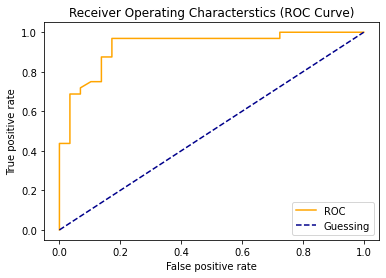

In [103]:
# Create a function for plotting the ROC curve
# Import necessary packages
import matplotlib.pyplot as plt

# Define a function to plot ROC curve
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) 
    and tru positive rate (tpr) of a model
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("Receiver Operating Characterstics (ROC Curve)")
    plt.legend()
    plt.show()
    
# Plot the ROC curve for our classification model
plot_roc_curve(fpr, tpr)

In [104]:
# Check AUC score
# Import necessary packages
from sklearn.metrics import roc_auc_score

# Calculate the AUC score
roc_auc_score(Y_test, Y_probs_positive)

0.9304956896551724

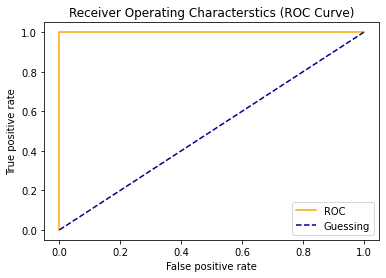

In [105]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(Y_test, Y_test)

# Plot the ROC curve
plot_roc_curve(fpr, tpr)

In [106]:
# Perfect AUC score
roc_auc_score(Y_test, Y_test)

1.0

##### 4.2.1.3. Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [107]:
# Import confusion matrix package
from sklearn.metrics import confusion_matrix

# Create confusion matrix
Y_preds = clf.predict(X_test)
confusion_matrix(Y_test, Y_preds)


array([[24,  5],
       [ 4, 28]], dtype=int64)

In [108]:
# Visualize confusion matrix with pd.crosstab
pd.crosstab(Y_test,
            Y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [109]:
# Install Seaborn from Jupyter Notebook

In [110]:
import sys
!conda install --yes --prefix "{sys.prefix}" seaborn



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda





Solving environment: ...working... done

# All requested packages already installed.



<AxesSubplot:>

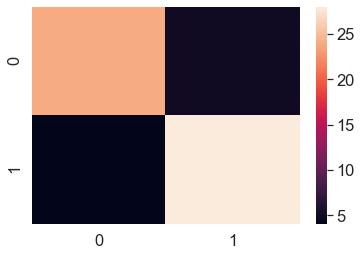

In [111]:
# Make our confusion matrix more visual with Seaborn's heatmap()
# Import Seaborn
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_preds)

# Plot confusion matrix using Seaborn
sns.heatmap(conf_matrix)

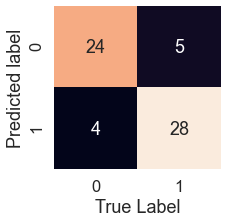

In [112]:
# Define a Python function to plot confusion matrix using Seaborn's heatmap()
def plot_conf_matrix(conf_matrix):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_matrix,
                     annot=True, # Annotate the boxes with conf_matrix info
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")

# Plot the confusion matrix
plot_conf_matrix(conf_matrix)

##### 4.2.1.4 Classification Report

In [113]:
# Import Classification Report
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [114]:
# Example where precision recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # Model predicts every case as 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds,
                                   output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

* Accuracy is a good measure to start with if all the classes are balanced (e.g.same amount of samples which are labeled with 0 or 1)
* Precision and recall become more important when classes are imbalanced
* If false positive predictions are worse than false negative, aim for higher precision
* If false negative predictions are worse than false positive, aim for higher recall
* F1-score is a combination of precision and recall

#### 4.2.2. Regression Model - Evaluation Metrics
Model evaluation metrics documentation: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics 

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

In [115]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


##### 4.2.2.1 R^2 - Coefficient of determination

What r-squared does: Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [119]:
# Let's try RandomForestRegressor on previous boston data set
# Import necessary packages
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split the data into X and Y
X = boston_df.drop("target", axis=1)
Y = boston_df["target"]

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate the RandomForestClassifier model
clf = RandomForestRegressor()

# Fit the model on training data set
clf.fit(X_train, Y_train)

# Evaluate and score model on test data set
clf.score(X_test, Y_test)

0.9251576752800783

In [126]:
# Import R^2 
from sklearn.metrics import r2_score

# Fill an array with Y_test mean
Y_test_mean = np.full(len(Y_test), Y_test.mean())

In [127]:
Y_test.mean()

22.913725490196075

In [128]:
r2_score(Y_test, Y_test_mean)

0.0

In [129]:
r2_score(Y_test, Y_test)

1.0

##### 4.2.2.2 Mean Absolute Error (MAE)

MAE is the average of the absolute differences between predictions and actual values. It gives an idea of how wrong your model's predictions are.

In [131]:
# Import Mean Absolute Error
from sklearn.metrics import mean_absolute_error

# Calculate predictions
Y_preds = clf.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_preds)
mae

1.9317058823529445

In [133]:
# Create a data frame for visualization
df = pd.DataFrame(data={"actual values": Y_test,
                        "predicted values": Y_preds})

df["differences"] = df["predicted values"] - df["actual values"]
df.head()

,actual values,predicted values,differences
97,38.7,44.487,5.787
483,21.8,20.566,-1.234
474,13.8,14.631,0.831
224,44.8,44.364,-0.436
106,19.5,18.433,-1.067


##### 4.2.2.3 Mean Squared Error (MSE)

In [135]:
# Import Mean Squared Error
from sklearn.metrics import mean_squared_error

# Calculate predictions
Y_preds = clf.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_preds)
mse

7.378294470588255

In [137]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

7.378294470588255

### 4.2 Evaluating a model using the scoring parameter

In [139]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Set the random seed
np.random.seed(42)

# Split the data into X and Y
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# Instantiate the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

cv_acc = cross_val_score(model, X, Y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [147]:
# Cross validated accuracy with scoring parameter as None
np.random.seed(42)
cv_acc = cross_val_score(model, X, Y, cv=5, scoring=None)
print(f"Cross validated accuracy is: {np.mean(cv_acc) * 100}%")

Cross validated accuracy is: 82.48087431693989%


In [148]:
# Cross validated accuracy with scoring parameter as accuracy
np.random.seed(42)
cv_acc = cross_val_score(model, X, Y, cv=5, scoring="accuracy")
print(f"Cross validated accuracy is: {np.mean(cv_acc) * 100}%")

Cross validated accuracy is: 82.48087431693989%


In [152]:
# Cross validated precision
cv_precision = cross_val_score(model, X, Y, cv=5, scoring="precision")
cv_precision, np.mean(cv_precision)

(array([0.83333333, 0.90625   , 0.81818182, 0.82857143, 0.725     ]),
 0.8222673160173161)

In [155]:
# Cross validated recall
cv_recall = cross_val_score(model, X, Y, cv=5, scoring="recall")
cv_recall, np.mean(cv_recall)

(array([0.90909091, 0.87878788, 0.78787879, 0.87878788, 0.84848485]),
 0.8606060606060606)

In [156]:
# Cross validated F-1
cv_f1 = cross_val_score(model, X, Y, cv=5, scoring="f1")
cv_f1, np.mean(cv_f1)

(array([0.86956522, 0.87878788, 0.83076923, 0.76190476, 0.78873239]),
 0.8259518966438746)

How about regression model

In [158]:
# Import necessary packages
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Set the random seed
np.random.seed(42)

# Split the data into X and Y
X = boston_df.drop("target", axis=1)
Y = boston_df["target"]

# Instantiate the RandomForestRegressor model
rfr = RandomForestRegressor(n_estimators=100)

In [159]:
np.random.seed(42)
# Calculate cross val score None or R^2
cv_r2 = cross_val_score(rfr, X, Y, cv=5, scoring="r2")
cv_r2, np.mean(cv_r2)

(array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379]),
 0.6243870737930857)

In [160]:
np.random.seed(42)
# Calculate cross val score with scoring parameter as None or R^2
cv_r2 = cross_val_score(rfr, X, Y, cv=5, scoring=None)
cv_r2, np.mean(cv_r2)

(array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379]),
 0.6243870737930857)

In [162]:
# Calculate cross val socre with scoring parameter as MAE
np.random.seed(42)
cv_mae = cross_val_score(rfr, X, Y, cv=5, scoring="neg_mean_absolute_error")
cv_mae, np.mean(cv_mae)

(array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584]),
 -3.0312352552902335)

In [163]:
# Calculate cross val score with scoring paramter as MSE
np.random.seed(42)
cv_mse = cross_val_score(rfr, X, Y, cv=5, scoring="neg_mean_squared_error")
cv_mse, np.mean(cv_mse)

(array([ -7.86326927, -12.71243178, -20.29089194, -45.93287403,
        -19.50774726]),
 -21.261442856882137)

### 4.3 Evaluating a model using the Scikit-Learn metric functions

Using different evaluation metrics as Scikit-Learn functions

#### Classification Model Evaluation 

In [168]:
# Import score methods from metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import train_test_split
from sklearn.model_selection import train_test_split

# Set the random see
np.random.seed(42)

# Split the data into X and Y
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# Split the data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model on training data
clf.fit(X_train, Y_train)

# Make predictions on test data
Y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(Y_test, Y_preds) * 100 : .2f}")
print(f"Precision: {precision_score(Y_test, Y_preds)}")
print(f"Recall: {recall_score(Y_test, Y_preds)}")
print(f"F-1: {f1_score(Y_test, Y_preds)}")

Classifier metrics on the test set
Accuracy:  85.25
Precision: 0.8484848484848485
Recall: 0.875
F-1: 0.8615384615384615


#### Regression Model Evaluation 

In [170]:
# Import metrics score methods 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Import train_test_split
from sklearn.model_selection import train_test_split

# Set the random seed
np.random.seed(42)

# Split the data into X and Y
X = boston_df.drop("target", axis=1)
Y = boston_df["target"]

# Split the data into traning and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate the RandomForestRegressor model
rfr = RandomForestRegressor(n_estimators=100)

# Fit the RandomForestRegresor model on training set
rfr.fit(X_train, Y_train)

# Make some prediction on test set
Y_preds = rfr.predict(X_test)

# Evaluate the regressor
print("Regressor metrics on test set")
print(f"R^2: {r2_score(Y_test, Y_preds)}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test, Y_preds)}")
print(f"Mean Squared Error {mean_squared_error(Y_test, Y_preds)}")

Regressor metrics on test set
R^2: 0.8654448653350507
Mean Absolute Error: 2.136382352941176
Mean Squared Error 9.867437068627442


## 5. Improving a model

First predictions = Base predictions
First model = Base model

From a data perspective:
* Could we collect more data (generally, the more data, the better)?
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve our current model?

Hyperparameters vs Parameters

Parameters = model finds these patterns in data

Hyperparameters = settings on a model you can adjust to (potentially) to improve it's ability to find patterns

In [172]:
# Let's try RandomForestClassifier
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Check the hyperparameters of RandomForestClassifier
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Three ways to adjust hyperparameters

1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

### 5.1 Tuning Hyperparameters by hand

Let's make three data sets training, validation and test. 

In [173]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### We're going to try and adjust:

* 'max_depth'
* 'max_features'
* 'min_samples_leaf'
* 'min_samples_split'
* 'n_estimators'

In [175]:
# Let's try RandomForestClassifier
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

In [176]:
# Import scikit-learn scoring methods
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a Python function to evaluate a model
def evaluate_preds(Y_true, Y_preds):
    """
    Performs evaluation comparison on Y_true and Y_preds labels on a classification
    """
    accuracy = accuracy_score(Y_true, Y_preds)
    precision = precision_score(Y_true, Y_preds)
    recall = recall_score(Y_true, Y_preds)
    f1 = f1_score(Y_true, Y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Accurcay: {accuracy * 100 : .2f}%")
    print(f"Precision: {precision : .2f}")
    print(f"Recall: {recall : .2f}")
    print(f"F1-Score: {f1 : .2f}")
    return metric_dict

In [177]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [195]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Set the random seed
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split the data into X and Y
X = heart_disease_shuffled.drop("target", axis =1)
Y = heart_disease_shuffled["target"]

# Split the data into training, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled))
validation_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, Y_train = X[:train_split], Y[:train_split]
X_validation, Y_validation = X[train_split:validation_split], Y[train_split:validation_split]
X_test, Y_test = X[validation_split:], Y[validation_split:]
len(X_train), len(X_validation), len(X_test)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model on training data
clf.fit(X_train, Y_train)

# Make predictions on validation set
Y_preds = clf.predict(X_validation)

# Evaluate the model on validation set
baseline_metrics = evaluate_preds(Y_validation, Y_preds)

Accurcay:  82.22%
Precision:  0.81
Recall:  0.88
F1-Score:  0.85


In [180]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### change n_estimators hyperparameter

In [194]:
# Set the random seed
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf2 = RandomForestClassifier(n_estimators=100)

# Fit the second model on training data
clf2.fit(X_train, Y_train)

# Make predictions on second model with validation set
Y_preds_2 = clf2.predict(X_validation)

# Evaluate the second model on validation set
clf2_metrics = evaluate_preds(Y_validation, Y_preds_2)

Accurcay:  91.11%
Precision:  0.92
Recall:  0.92
F1-Score:  0.92


##### change max_depth hyperparameter

In [193]:
# Set the random seed
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf3 = RandomForestClassifier(n_estimators=100,
                              max_depth=10)

# Fit the second model on training data
clf3.fit(X_train, Y_train)

# Make predictions on second model with validation set
Y_preds_3 = clf3.predict(X_validation)

# Evaluate the second model on validation set
clf3_metrics = evaluate_preds(Y_validation, Y_preds_3)

Accurcay:  91.11%
Precision:  0.92
Recall:  0.92
F1-Score:  0.92


### 5.2 Tuning Hyperparameters Randomly with RandomSearchCV (Randomized Search Cross Validation)

In [183]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [184]:
# Import RndomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create a dictionary of hyper parameters
hyper_param_dict = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
                    "max_depth": [None, 5, 10, 20, 30],
                    "max_features": ["auto", "sqrt"],
                    "min_samples_split": [2, 4, 6],
                    "min_samples_leaf": [1, 2, 4]}

# Set the random seed
np.random.seed(43)

# Split the data into X and Y
X = heart_disease_shuffled.drop("target", axis=1)
Y = heart_disease_shuffled["target"]

# Split the data into training, and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=hyper_param_dict,
                            n_iter=10, # Number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV verison of model on training set
rs_clf.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   3.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   3.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   3.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   3.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   3.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [185]:
# Check the best parameters
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20}

In [192]:
# Make predictions with best hyperparameters
rs_Y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(Y_test, rs_Y_preds)

Accurcay:  91.80%
Precision:  0.87
Recall:  0.96
F1-Score:  0.92


### 5.3 Tuning Hyperparameters with GridSearchCV 

RandomizedSearchCV vs GridSearchCV
- GridSearchCV goes brute force and doesn't have any iter parameter

In [187]:
hyper_param_dict

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [188]:
grid2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None, 5, 10, 20, 30],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [189]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import train_test_split
from sklearn.model_selection import train_test_split

# Set the random seed
np.random.seed(42)

# Split the data into X and Y
X = heart_disease_shuffled.drop("target", axis=1)
Y = heart_disease_shuffled["target"]

# Split the data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate the RandomForestClassifier model
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid2,
                      cv=5,
                      verbose=2)

# Fit the GridSearchCV version of the model on training data set
gs_clf.fit(X_train, Y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6,

[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.4s
[CV] END max_depth=5, max_features=auto, min_sam

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   2.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.3s
[CV] END max_depth=30, max_features=sqrt

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [191]:
# Make some prediction using GridSearchCV version of model on test data set
gs_Y_preds = gs_clf.predict(X_test)

# Evaluate the GridSearchCV version of the model
gs_metrics = evaluate_preds(Y_test, gs_Y_preds)

Accurcay:  80.33%
Precision:  0.75
Recall:  0.86
F1-Score:  0.80


##### Let's compare our different model metrics

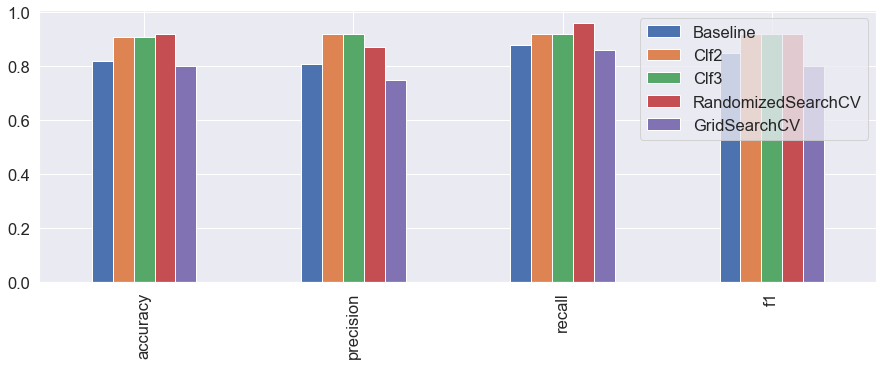

In [201]:
# Create data frame
compare_metric = pd.DataFrame({"Baseline":baseline_metrics,
                               "Clf2":clf2_metrics,
                               "Clf3":clf3_metrics,
                               "RandomizedSearchCV": rs_metrics,
                               "GridSearchCV": gs_metrics})
# Create the bar plot
compare_metric.plot.bar(figsize=(15,5));

## 6. Saving and loading a trained machine learning model

Two ways to save and load trained machine learning model
1. With Python's 'pickle' module
2. With the 'joblib' module

**Pickle**

In [202]:
# Import Pickle
import pickle

# Save an existing model to a file
pickle.dump(gs_clf, open("gs_random_forest_classification_model.pkl", "wb"))

In [203]:
# Load a saved module
loaded_model = pickle.load(open("gs_random_forest_classification_model.pkl", "rb"))

In [205]:
# Make some predictions
loaded_Y_preds = loaded_model.predict(X_test)

In [206]:
# Evaluate loaded module
evaluate_preds(Y_test, loaded_Y_preds)

Accurcay:  95.65%
Precision:  1.00
Recall:  0.92
F1-Score:  0.96


{'accuracy': 0.96, 'precision': 1.0, 'recall': 0.92, 'f1': 0.96}

**Joblib**

In [207]:
# Import joblib
from joblib import dump, load

# Save the model to file
dump(gs_clf, filename="gs_random_forest_classification_model1.joblib")

['gs_random_forest_classification_model1.joblib']

In [208]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [209]:
!dir

 Volume in drive E is Data
 Volume Serial Number is 7089-1542

 Directory of E:\StudyMaterial\Data Science\Projects\sample_project1

04-06-2021  02:06    <DIR>          .
04-06-2021  02:06    <DIR>          ..
31-05-2021  02:56    <DIR>          .ipynb_checkpoints
25-05-2021  20:59           332,025 6-step-ml-framework.png
26-05-2021  21:21               180 car-sales-missing-dropped-data.csv
31-05-2021  23:23    <DIR>          data
03-06-2021  03:02    <DIR>          env
25-05-2021  23:55             3,980 environment.yml
25-05-2021  22:13            23,872 example_notebook.ipynb
26-05-2021  00:56            11,585 exported-heart-desease.csv
04-06-2021  01:58           869,418 gs_random_forest_classification_model.pkl
04-06-2021  02:06           876,255 gs_random_forest_classification_model1.joblib
30-05-2021  23:07            75,417 heart-disease-analysis-plot-saved-with-code.png
28-05-2021  22:57    <DIR>          images
30-05-2021  23:09         1,213,764 introduction-to-matplotlib

In [210]:
# Load a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_classification_model1.joblib")

In [211]:
# Make some predictions on joblib loaded module
joblib_Y_preds = loaded_joblib_model.predict(X_test)

# Evaluate joblib loaded module
evaluate_preds(Y_test, joblib_Y_preds)

Accurcay:  95.65%
Precision:  1.00
Recall:  0.92
F1-Score:  0.96


{'accuracy': 0.96, 'precision': 1.0, 'recall': 0.92, 'f1': 0.96}

**Which one to use ?**

https://scikit-learn.org/stable/modules/model_persistence.html

## 7. Putting it all together

**Scikit-Learn Pipeline**

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

### Let's start with car_sales_extended_missing data

In [212]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [213]:
# Create data frame from csv
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [215]:
# Check data types of the columns
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [216]:
# Check missing values
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

##### Steps we want to do to put it all together
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [217]:
# Import necessary packages
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import the data and drop the rows with missing target label
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("one_hot", OneHotEncoder(handle_unknown="ignore"))])
door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))]) # Majority number of doors
numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (Fill missig values and then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
                                    ("cat", categorical_transformer, categorical_features),
                                    ("doors", door_transformer, door_feature),
                                    ("num", numeric_transformer, numeric_features)])

# Creating a preprocessing and modeling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

# Split data
X = data.drop("Price", axis=1)
Y = data["Price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Fit and score the model
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.22188417408787875

It's also possible to use GridSearchCV or RamdomizedSearchCV with our Pipeline

In [218]:
# Use GridSearchCV with our regression pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy":["mean", "median"],
    "model__n_estimators":[100, 1000],
    "model__max_depth":[None, 5],
    "model__max_features":["auto"],
    "model__min_samples_split":[2,4]
}

# Create GridSearchCV version of our model
gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)

# Fit the GridSearchCV version of our model
gs_model.fit(X_train, Y_train)

# Evaluate the GridSearchCV version of our model
gs_model.score(X_test, Y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   3.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   3.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

0.3339554263158365